In [1]:
!pip install numpy

In [2]:
!pip install pandas==2.2.3

In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 2.2.6
pandas 2.2.3
sklearn 1.6.1


In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')

In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.', regex=False).astype(float)

In [7]:
df.head(15)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
df.drop(columns=['ID'],inplace=True)

In [9]:
df.head(15)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [10]:
#Missing value treatment
df.isnull().sum().sum()

np.int64(0)

In [11]:
#duplicate value 
df.duplicated().sum()

np.int64(0)

In [12]:
num_col=['Age','Experience','Income','ZIP Code','CCAvg','Mortgage']

cat_col=['Family','Education','Securities Account','CD Account',
              'Online','CreditCard']
target='Personal Loan'

### Univariate Analysis

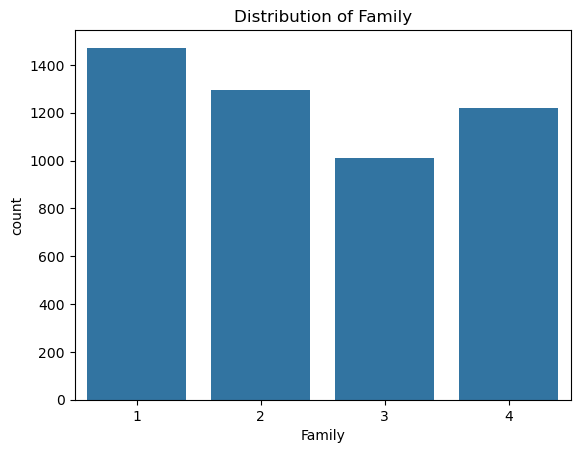

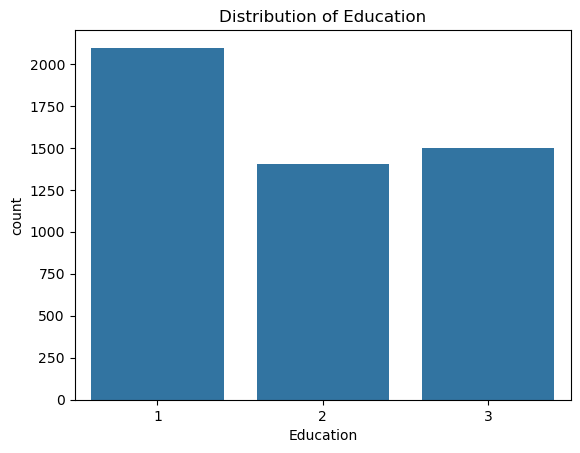

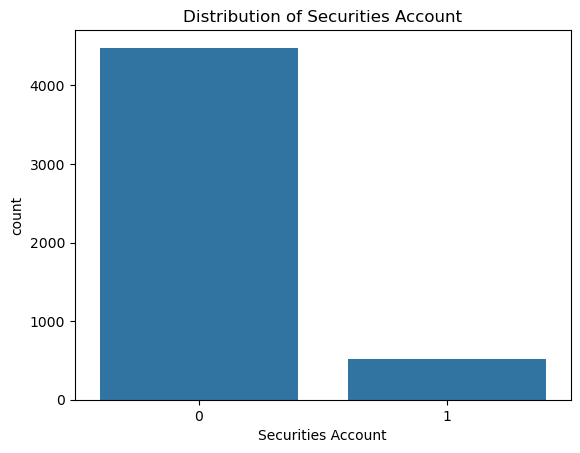

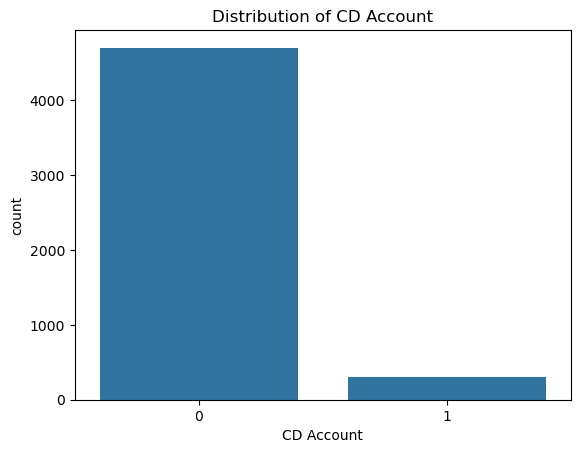

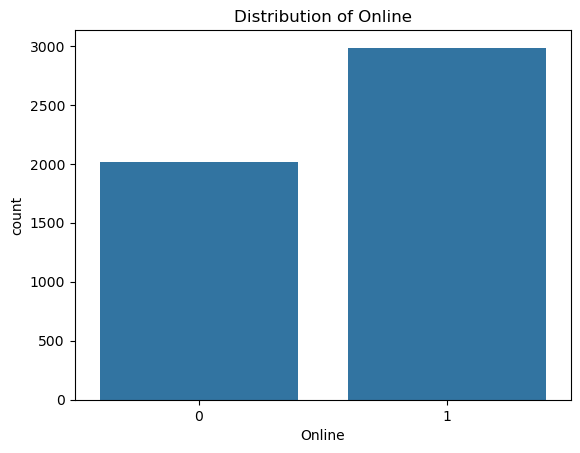

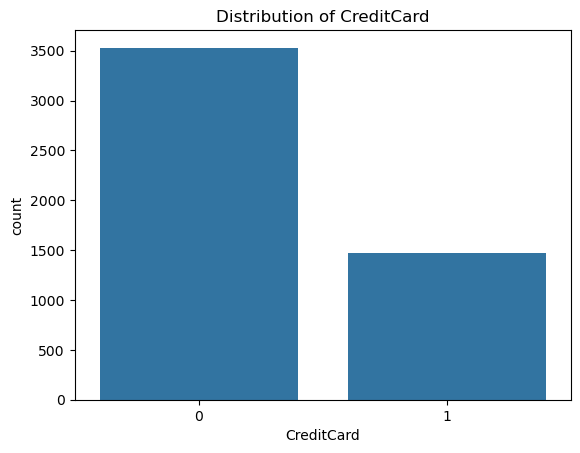

In [13]:
for column in cat_col:  
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

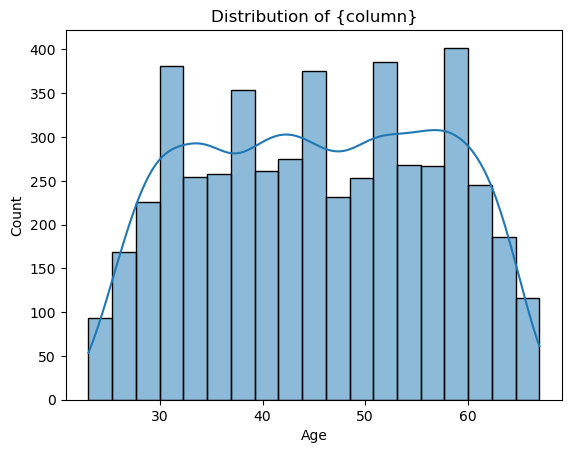

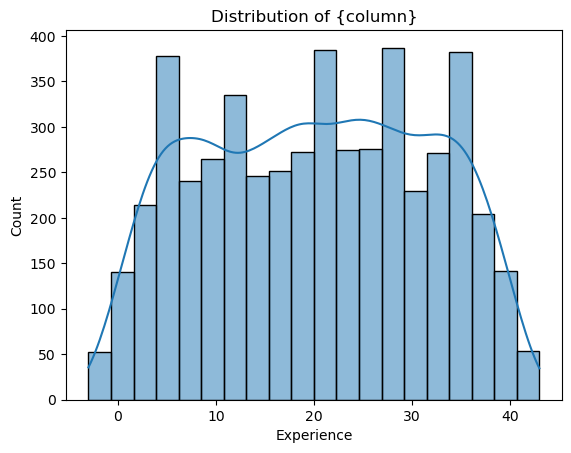

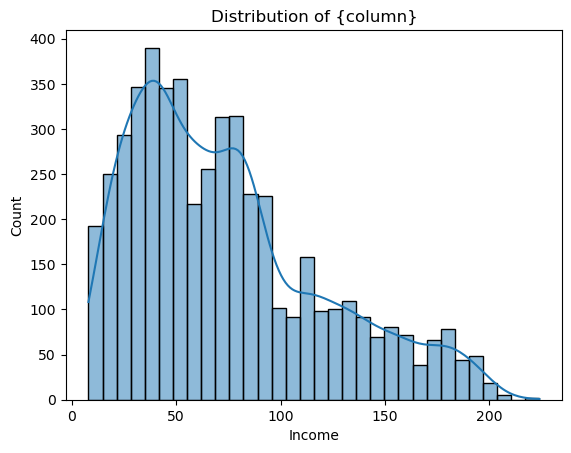

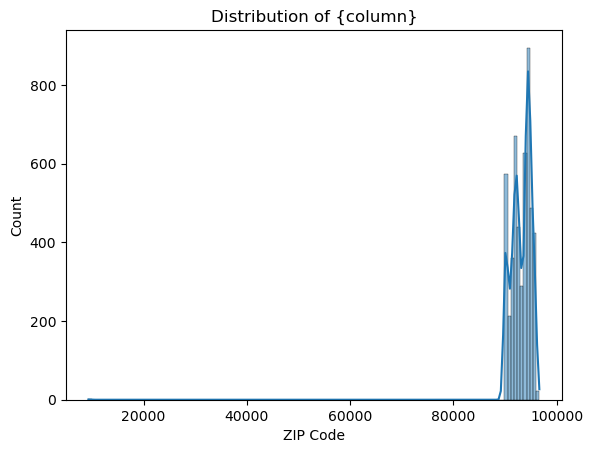

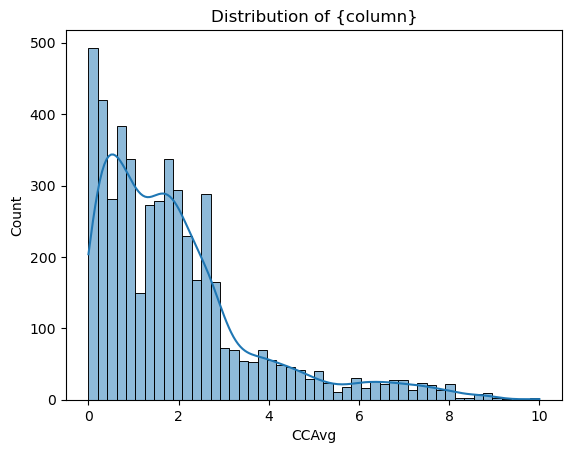

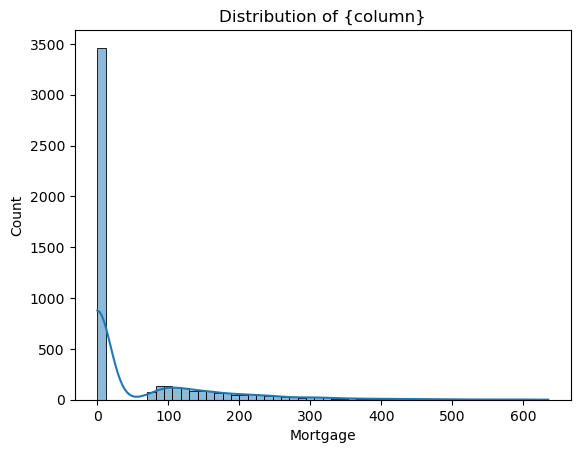

In [14]:
for column in num_col:  
    sns.histplot(data=df, x=column,kde=True)
    plt.title('Distribution of {column}')
    plt.show()

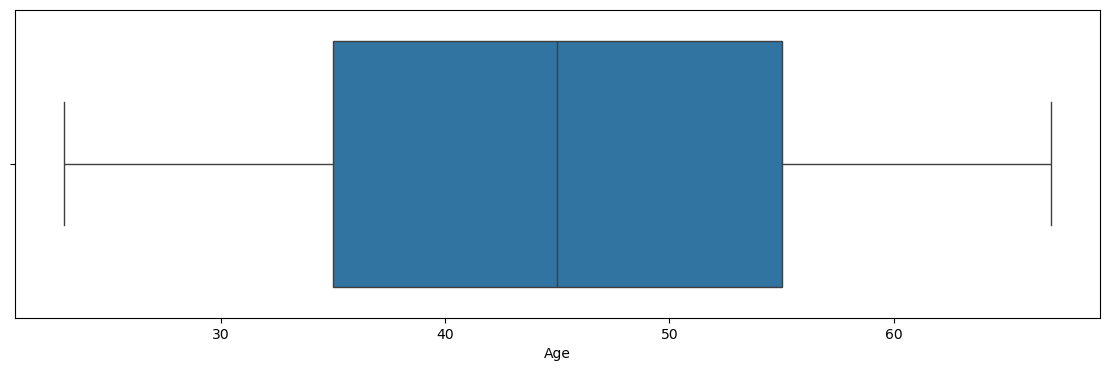

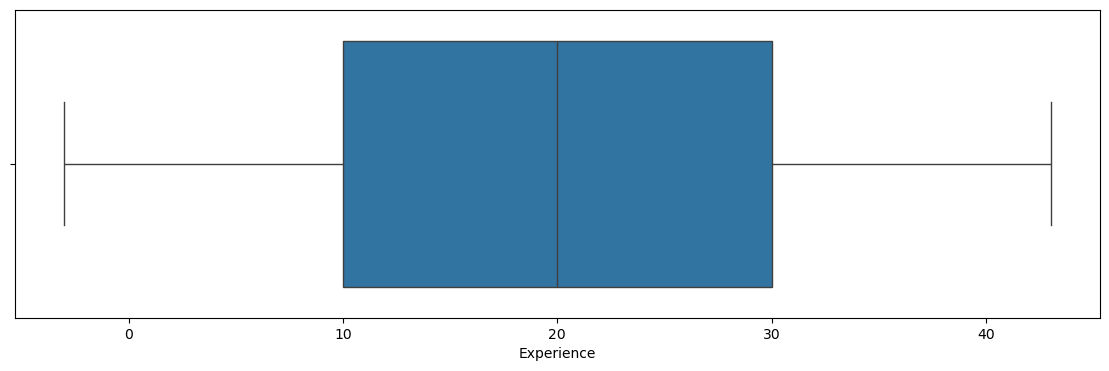

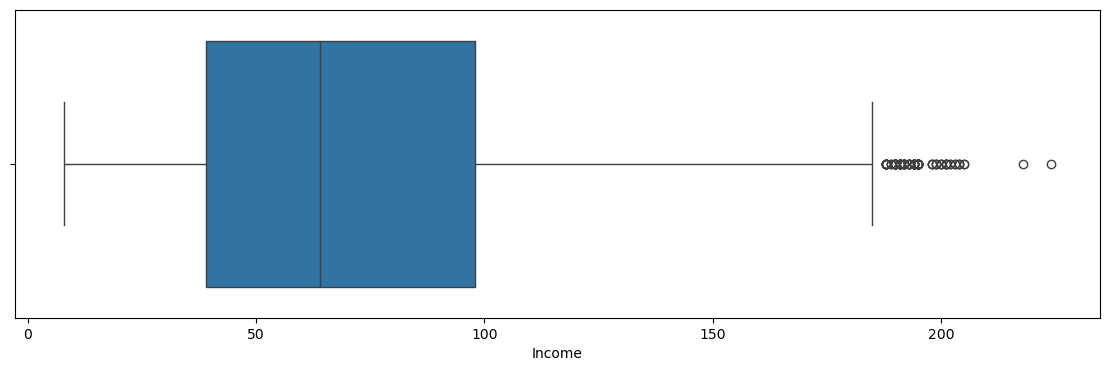

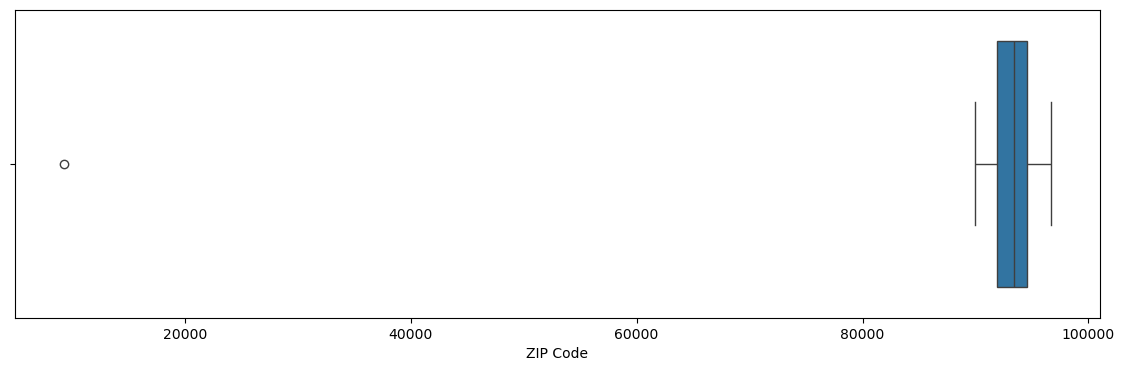

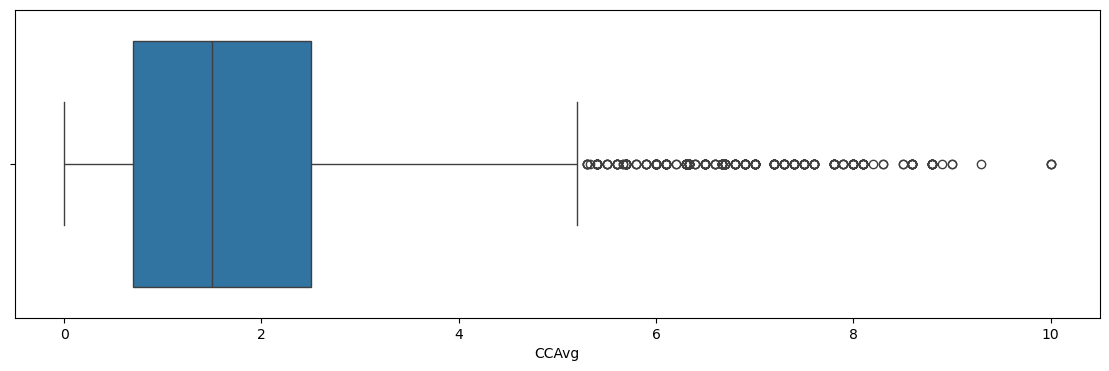

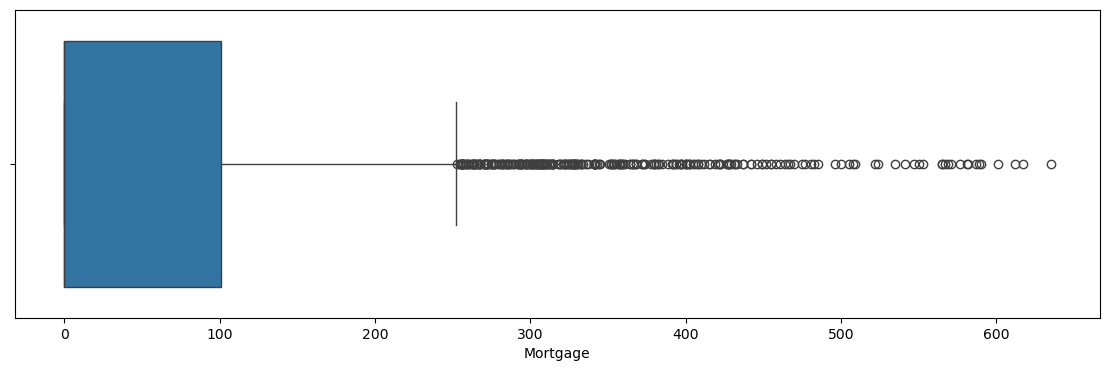

In [15]:
for i in num_col:
    plt.figure(figsize=(14,4))
    sns.boxplot(x=df[i])

In [16]:
#there is a noisy data in experience colummn
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [17]:
df['Experience']=df['Experience'].apply(abs)

In [18]:
df[df['Experience']<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [19]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
#outlier traetment
def outlier_treatment(col):
    print(col)
    p25=df[col].describe()['25%']
    p75=df[col].describe()['75%']
    iqr=p75-p25
    up=p75+1.5*iqr
    print(up)
    low=p25-1.5*iqr
    print(low)
    a=df[(df[col]<low) | (df[col]>up)].shape[0]
    print(a)
    if a>0:
        print('*************')
        df[col]=np.where(df[col]>up , up , np.where(df[col]<low , low , df[col]))
        print(df[(df[col]<low) | (df[col]>up)].shape[0])

In [21]:
for col in num_col:
    outlier_treatment(col)

Age
85.0
5.0
0
Experience
60.0
-20.0
0
Income
186.5
-49.5
96
*************
0
ZIP Code
98653.5
87865.5
1
*************
0
CCAvg
5.2
-2.0
324
*************
0
Mortgage
252.5
-151.5
291
*************
0


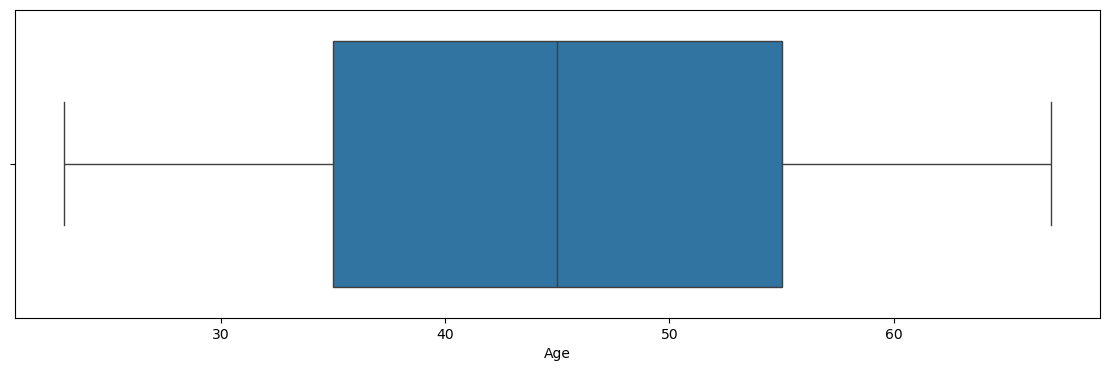

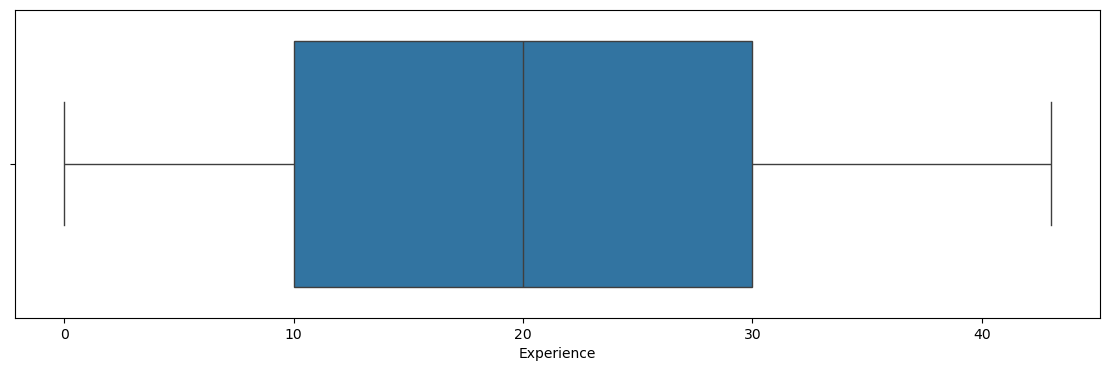

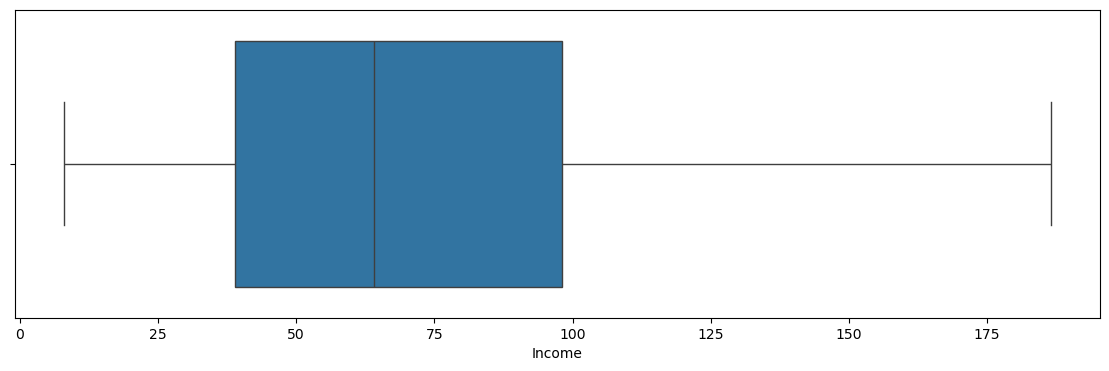

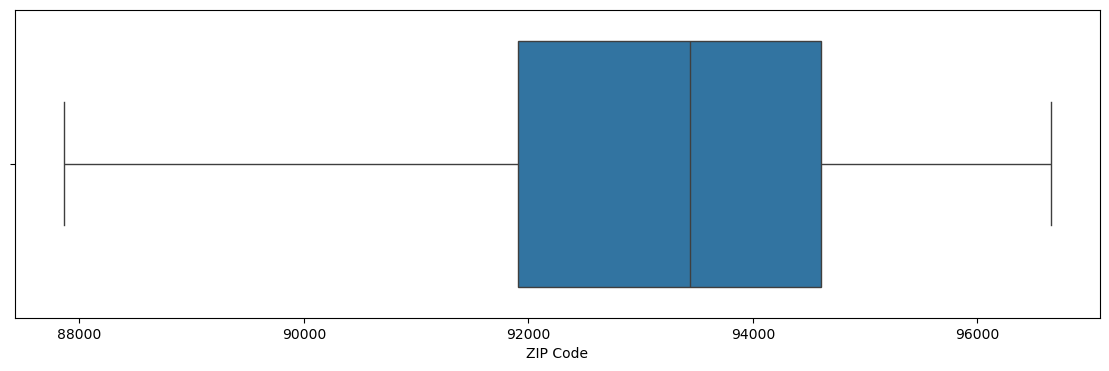

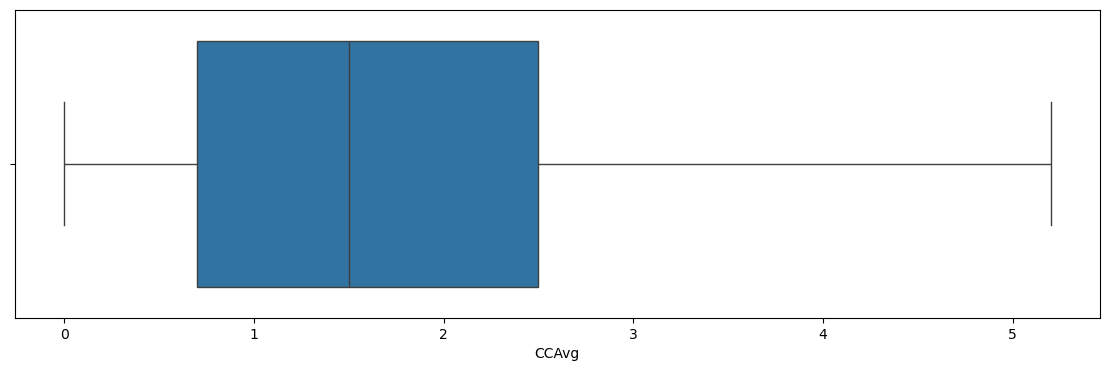

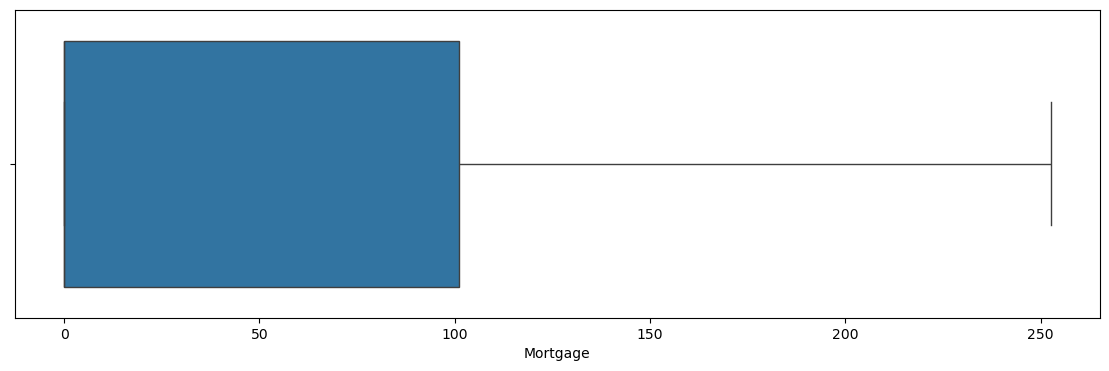

In [22]:
for i in num_col:
    plt.figure(figsize=(14,4))
    sns.boxplot(x=df[i])

In [23]:
#feature tranformation
df['CCAvg']=df['CCAvg']*12

### Bivariate Analysis

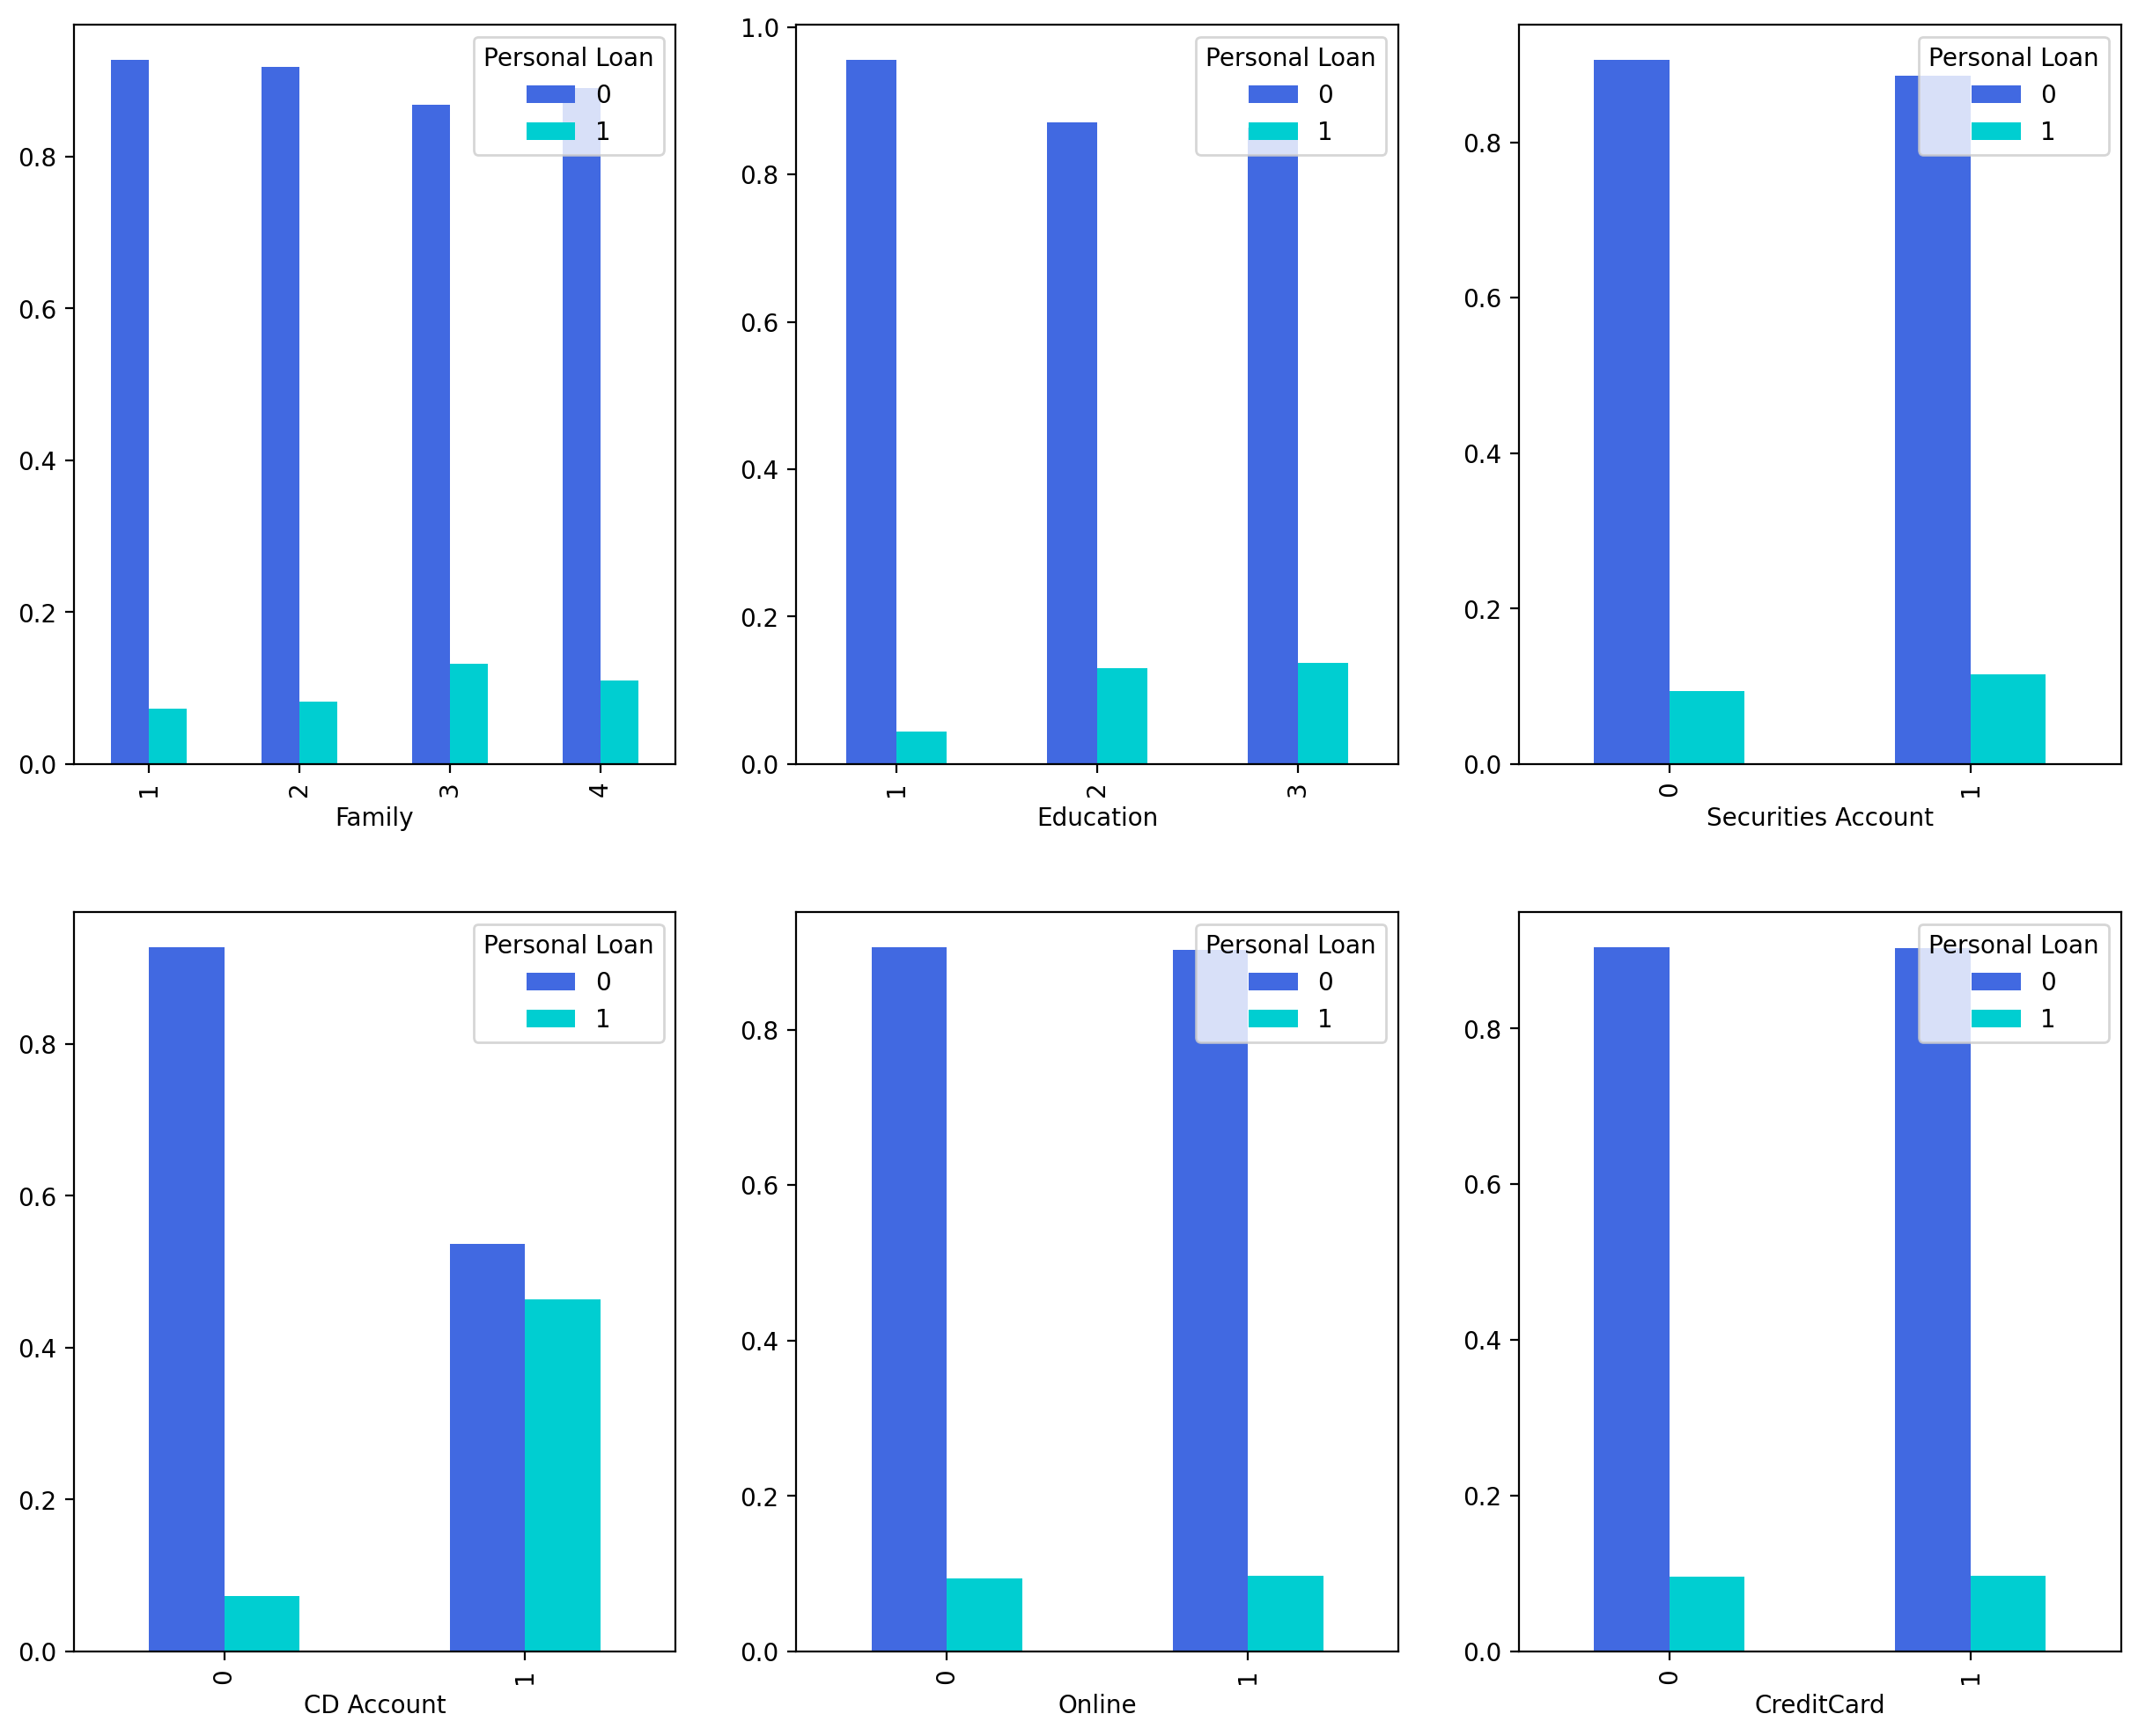

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)
for i,col in enumerate(cat_col):
    cross_tab = pd.crosstab(index=df[col], columns=df[target])
    cross_tab_prop=pd.crosstab(index=df[col],columns=df[target],normalize='index')
    cmp=ListedColormap(['royalblue','darkturquoise'])
    x,y=i//3,i%3
    cross_tab_prop.plot(kind='bar',ax=ax[x,y],colormap=cmp,legend=True)

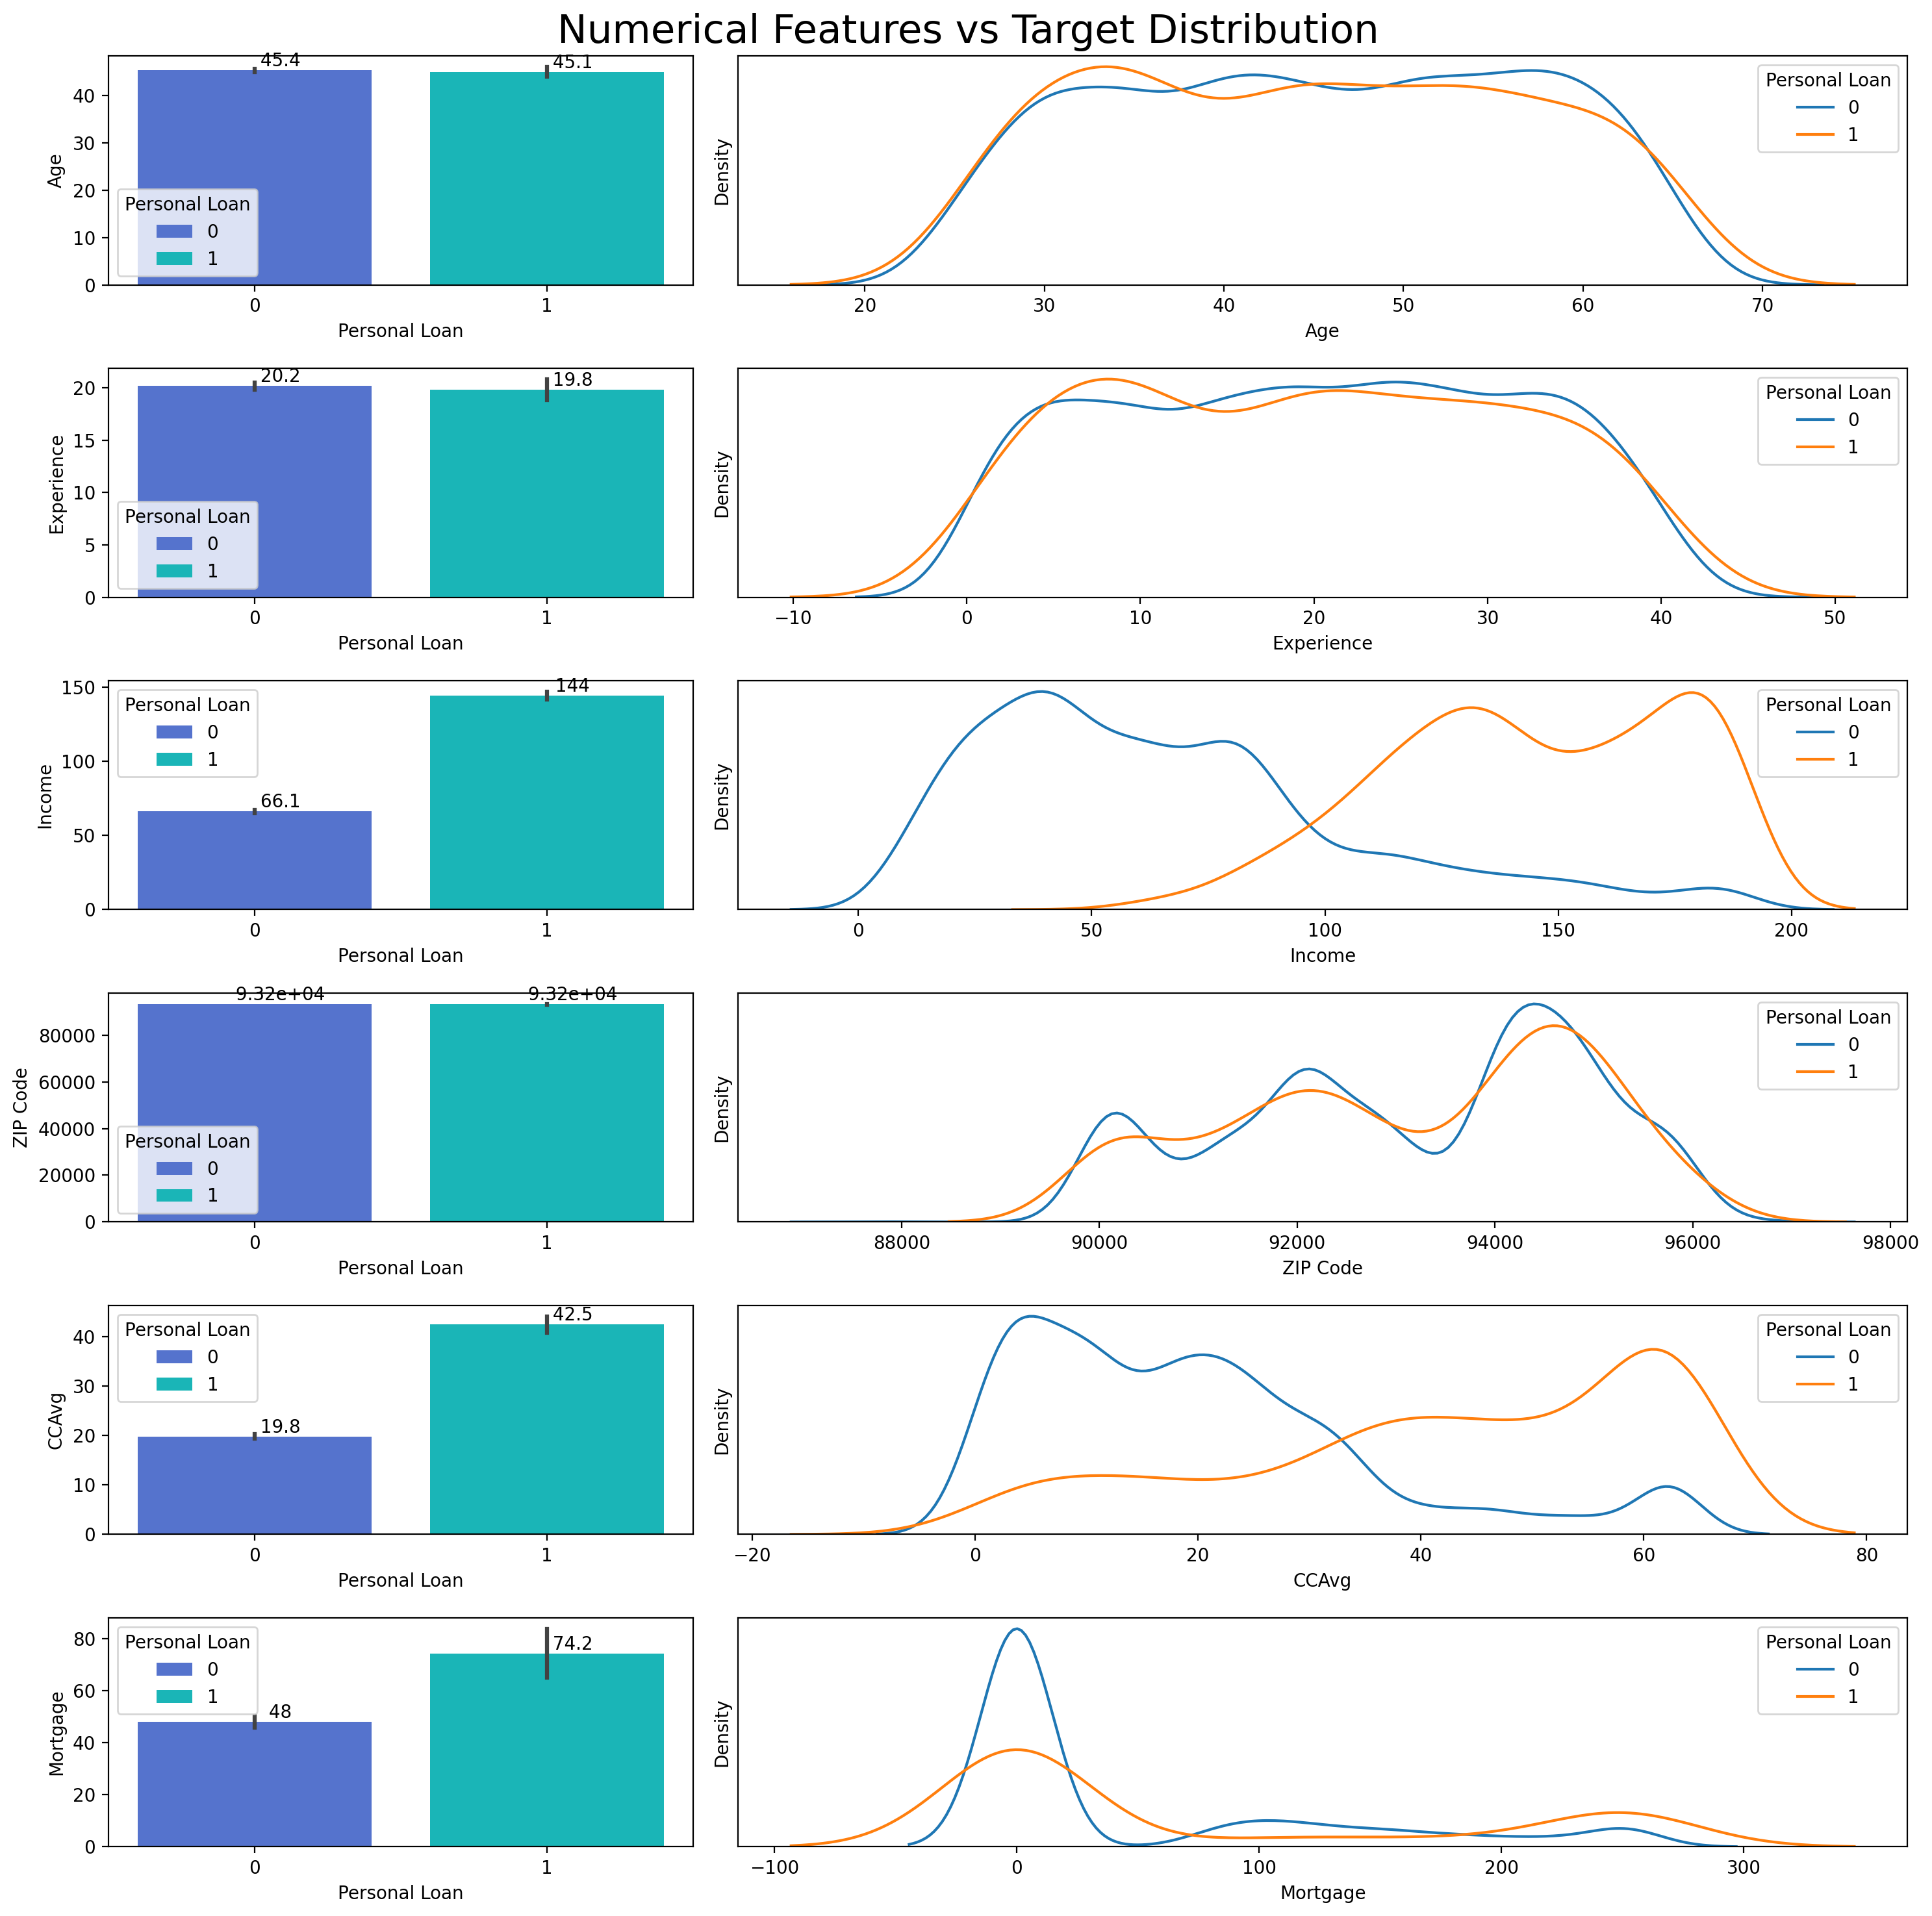

In [25]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=200,
                       gridspec_kw={'width_ratios': [1, 2]})
for i,col in enumerate(num_col):
    graph=sns.barplot(data=df,x=target,y=col,ax=ax[i,0],hue=target,palette=['royalblue', 'darkturquoise'])
    sns.kdeplot(data=df[df[target]==0],x=col,ax=ax[i,1],label='0')
    sns.kdeplot(data=df[df[target]==1],x=col,ax=ax[i,1],label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Personal Loan', loc='upper right')
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [26]:
#we remove Experience because it doesn't provide any more information than Age
df.drop('Experience', axis=1, inplace=True)

In [27]:
# train test split
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'] 

Text(0.5, 1.0, 'Frequency Percentage of Target Classes')

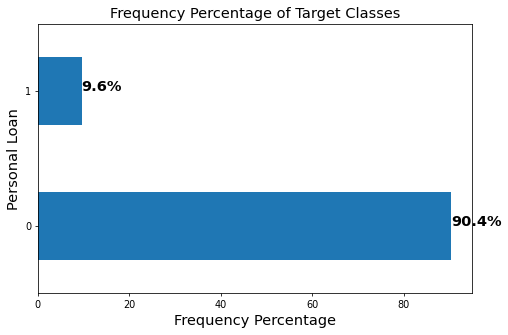

In [28]:
plt.figure(dpi=70)
df['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', figsize=(8,5))
labels = df['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=0, stratify=y.values)

<Axes: >

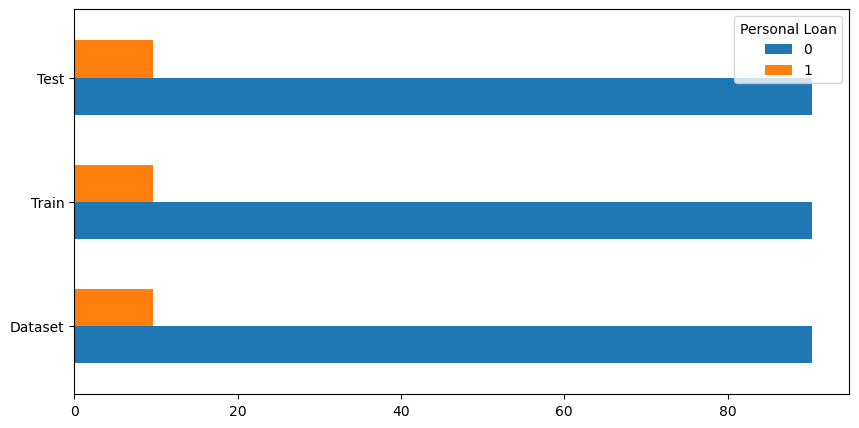

In [30]:
df_perc=pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                   y_train.value_counts(normalize=True).mul(100).round(1),
                   y_test.value_counts(normalize=True).mul(100).round(1)],axis=1)
df_perc.columns=['Dataset','Train','Test']
df_perc = df_perc.T
df_perc.plot(kind='barh', figsize=(10,5), width=0.6)

In [31]:
df_perc

Personal Loan,0,1
Dataset,90.4,9.6
Train,90.4,9.6
Test,90.4,9.6


## Feature Importance Implementation

In [32]:
def f1_metric(model, x_train, y_train):
    return f1_score(y_train, model.predict(x_train), average='binary')

In [33]:
def drop_column_importance(model, x_train, y_train, random_state=0):
    importances = []
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(x_train, y_train)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    benchmark_score = cross_val_score(model_clone, x_train, y_train, cv=cv, scoring=f1_metric).mean()

# Iterate over all features and store feature importance
    for col in x_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(x_train.drop(col, axis = 1), y_train)
        drop_column_score = cross_val_score(model_clone, x_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': x_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df 

In [34]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

### Apply LogisticRegression

In [35]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [36]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 
               'penalty':[None], 
               'class_weight':class_weights}, 
              
              {'solver':['lbfgs', 'newton-cg', 'sag'], 
               'penalty':['l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['saga'], 
               'penalty':['elasticnet'], 
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), 
               'class_weight':class_weights}]

In [37]:
def tune_clf_hyperparameters(clf, param_grid, x_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    clf_grid.fit(x_train, y_train)

    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    return clf_grid.best_estimator_

In [38]:
logreg = LogisticRegression(max_iter=1000)
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, x_train, y_train)

Best hyperparameters:
 {'C': np.float64(3.593813663804626), 'class_weight': {0: np.float64(0.4737368421052632), 1: np.float64(0.5262631578947368)}, 'penalty': 'l2', 'solver': 'lbfgs'}


In [39]:
drop_column_importance(logreg_opt, x_train, y_train)

,feature,feature importance
0,Income,0.200686
1,Education,0.131762
2,CD Account,0.048309
3,CreditCard,0.024699
4,CCAvg,0.024010
5,Family,0.019859
6,Securities Account,0.013427
7,Online,0.012090
8,Age,0.009232
9,ZIP Code,0.004199


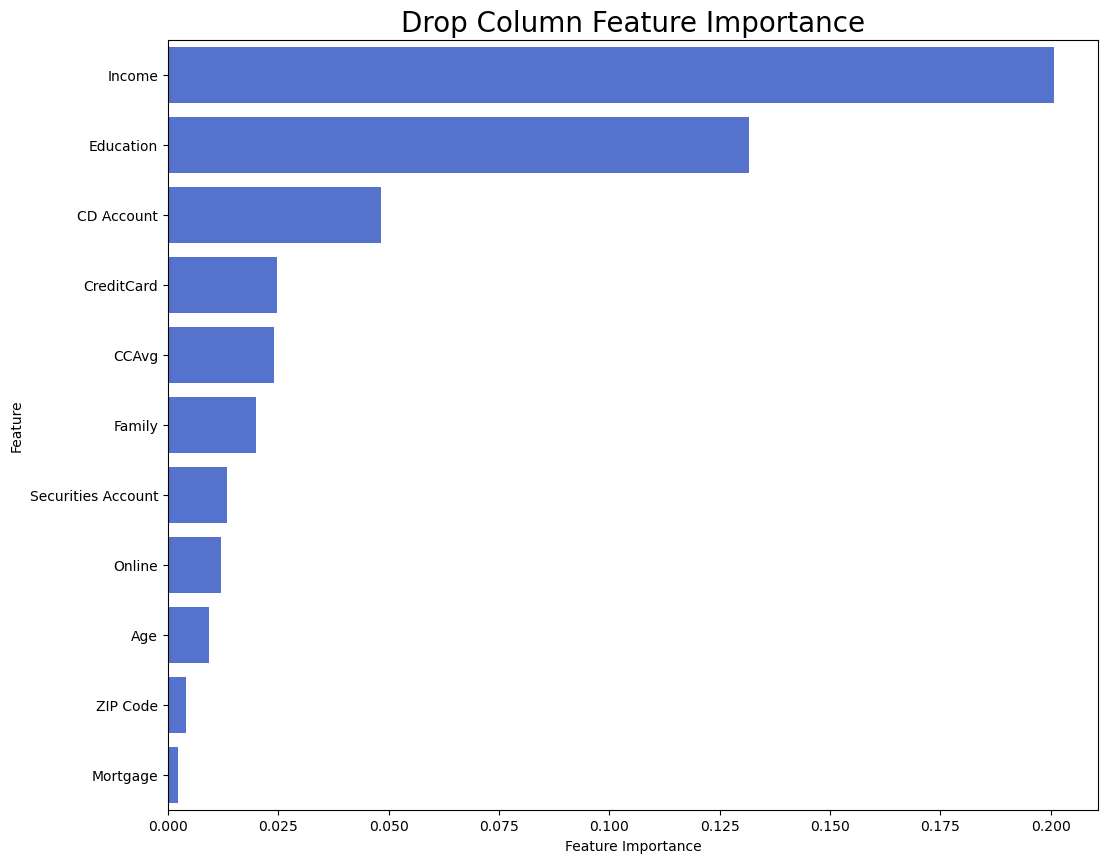

In [40]:
drop_column_importance_plot(logreg_opt, x_train, y_train)

In [41]:
y_pred=logreg_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.86      0.68      0.76        96

    accuracy                           0.96      1000
   macro avg       0.91      0.83      0.87      1000
weighted avg       0.96      0.96      0.96      1000



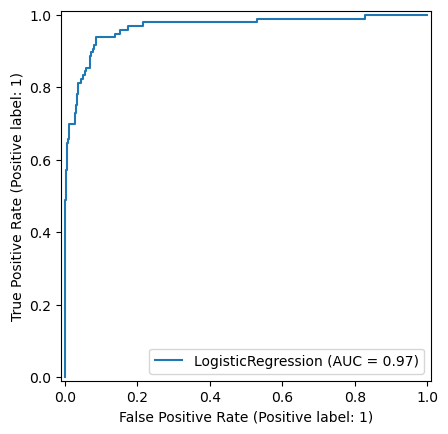

In [42]:
RocCurveDisplay.from_estimator(logreg_opt, x_test, y_test)

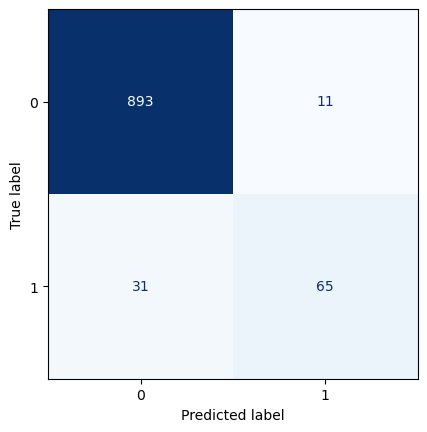

In [43]:
ConfusionMatrixDisplay.from_estimator(logreg_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [44]:
accuracy_score(y_pred,y_test)

0.958

# KNN Model

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=0, stratify=y)

In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [47]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

In [48]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, x_train, y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': np.int64(16), 'weights': 'uniform'}


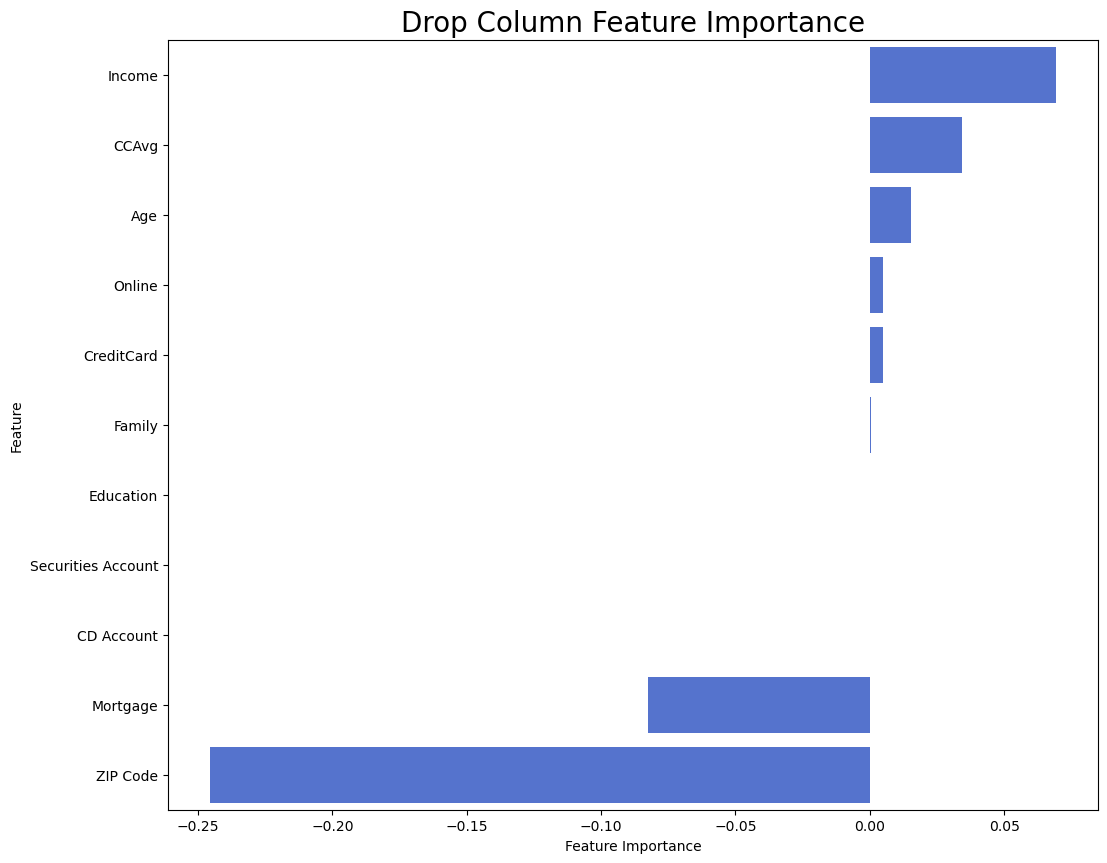

In [49]:
drop_column_importance_plot(knn_opt, x_train, y_train)                   

In [50]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, x_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [51]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, x_train, y_train)

#option of this block
#knn_opt.fit(x_train,y_train)

Best hyperparameters:
 {'metric': 'manhattan', 'n_neighbors': np.int64(3), 'weights': 'uniform'}


In [52]:
y_pred=knn_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       904
           1       0.78      0.40      0.52        96

    accuracy                           0.93      1000
   macro avg       0.86      0.69      0.74      1000
weighted avg       0.92      0.93      0.92      1000



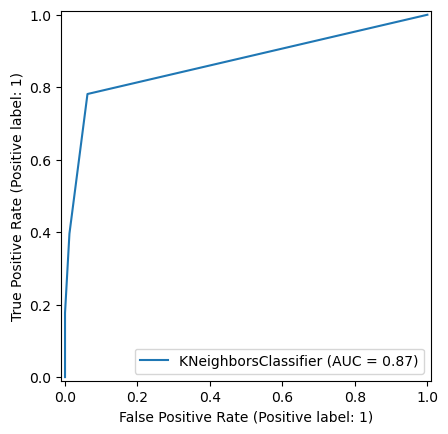

In [53]:
RocCurveDisplay.from_estimator(knn_opt, x_test, y_test)

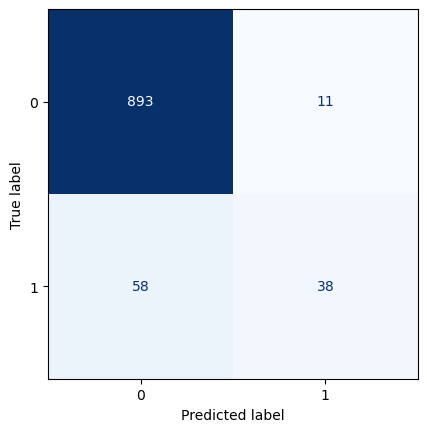

In [54]:
ConfusionMatrixDisplay.from_estimator(knn_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [55]:
accuracy_score(y_pred,y_test)

0.931

# Decision Tree

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [57]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

In [58]:
dt = DecisionTreeClassifier(random_state=0)
dt_opt = tune_clf_hyperparameters(dt, param_grid, x_train, y_train)

Best hyperparameters:
 {'class_weight': {0: np.float64(0.36905263157894735), 1: np.float64(0.6309473684210527)}, 'criterion': 'entropy', 'max_depth': np.int64(4), 'max_features': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}


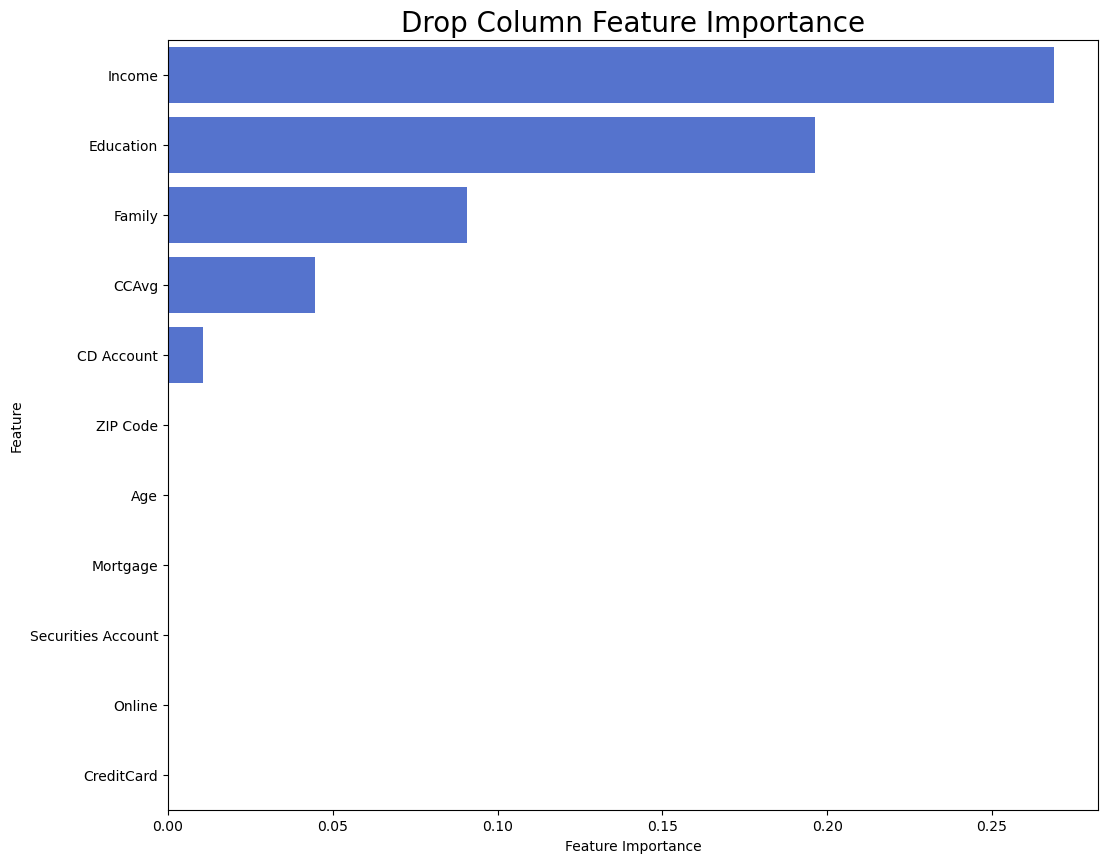

In [59]:
drop_column_importance_plot(dt_opt, x_train, y_train)

In [60]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(dt_opt, x_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] # Threshold value of 0.01

# Filter dataset
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [61]:
# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, x_train, y_train)

Best hyperparameters:
 {'class_weight': {0: np.float64(0.36905263157894735), 1: np.float64(0.6309473684210527)}, 'criterion': 'entropy', 'max_depth': np.int64(4), 'max_features': None, 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2)}


In [62]:
y_pred=dt_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.92      0.90      0.91        96

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000



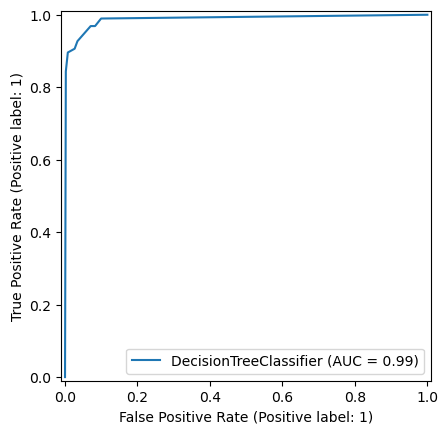

In [63]:
RocCurveDisplay.from_estimator(dt_opt, x_test, y_test)

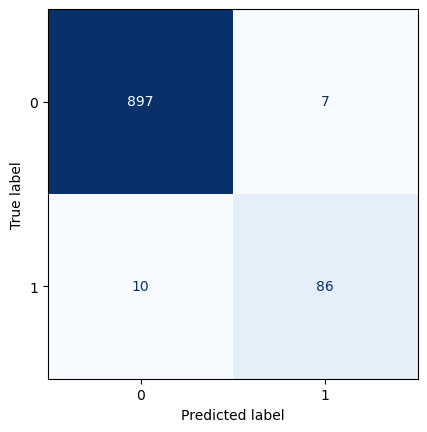

In [64]:
ConfusionMatrixDisplay.from_estimator(dt_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [65]:
accuracy_score(y_pred,y_test)

0.983

# Random Forest

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [67]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

In [68]:
# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_opt = tune_clf_hyperparameters(rf, param_grid, x_train, y_train)

Best hyperparameters:
 {'class_weight': {0: np.float64(0.36905263157894735), 1: np.float64(0.6309473684210527)}, 'max_depth': np.int64(7), 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


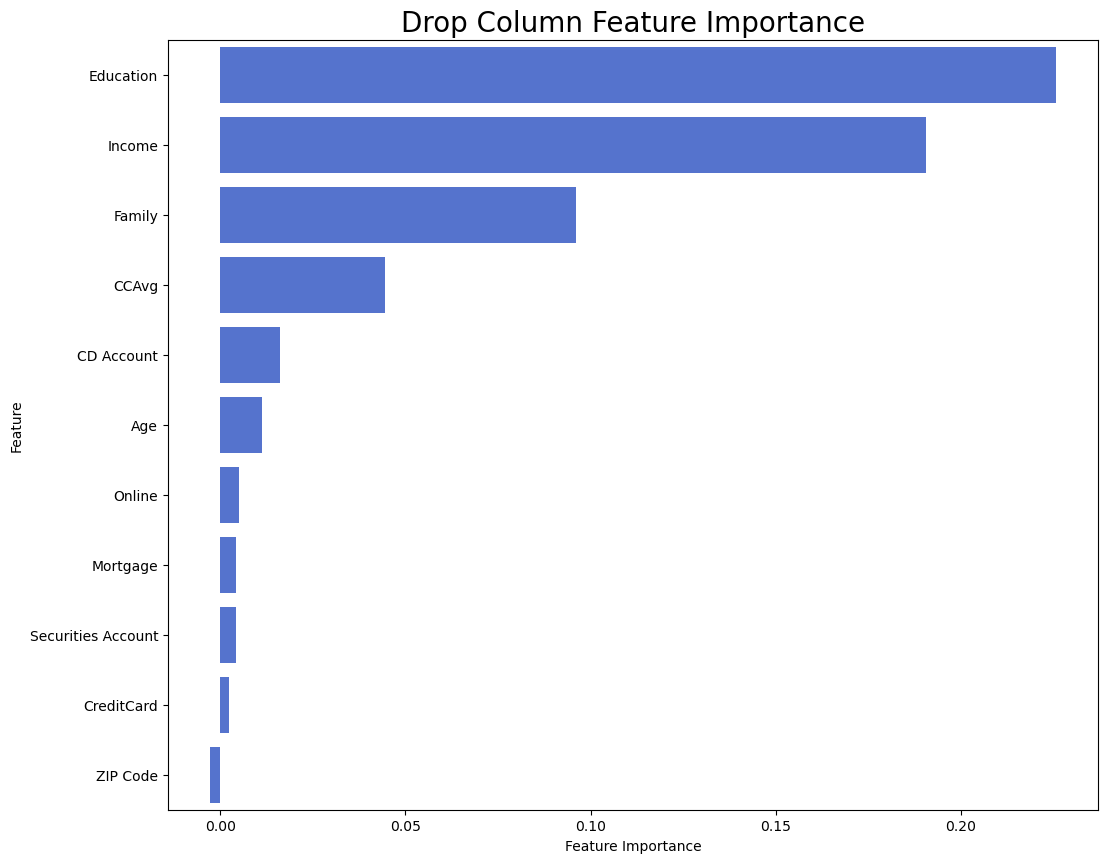

In [69]:
drop_column_importance_plot(rf_opt, x_train, y_train)

In [70]:
y_pred=rf_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.92      0.91      0.91        96

    accuracy                           0.98      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.98      0.98      0.98      1000



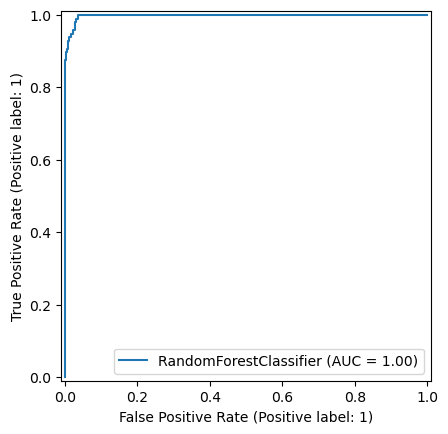

In [71]:
RocCurveDisplay.from_estimator(rf_opt, x_test, y_test)

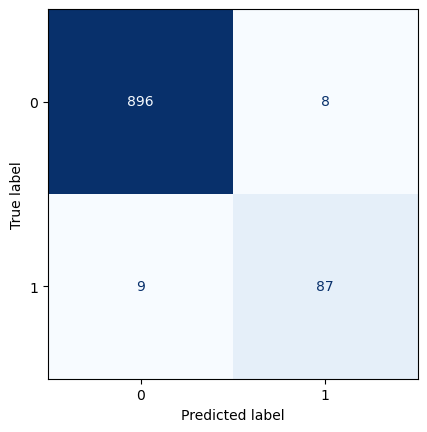

In [72]:
ConfusionMatrixDisplay.from_estimator(rf_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [73]:
accuracy_score(y_pred,y_test)

0.983

# AdaBoost

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [75]:
# Define the hyperparameter grid for AdaBoost
ada_param_grid = {
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_split': [3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.8, 0.9, 1]
}

In [76]:
# Create the Decision Tree classifier as the base estimator
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state=0)

# Create the AdaBoost classifier using Decision Tree as base estimator
ada = AdaBoostClassifier(estimator=dt, random_state=0)

# Find the best AdaBoost classifier with the optimal hyperparameters
ada_opt = tune_clf_hyperparameters(ada, ada_param_grid, x_train, y_train)

Best hyperparameters:
 {'estimator__max_depth': 5, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 7, 'learning_rate': 0.8, 'n_estimators': 50}


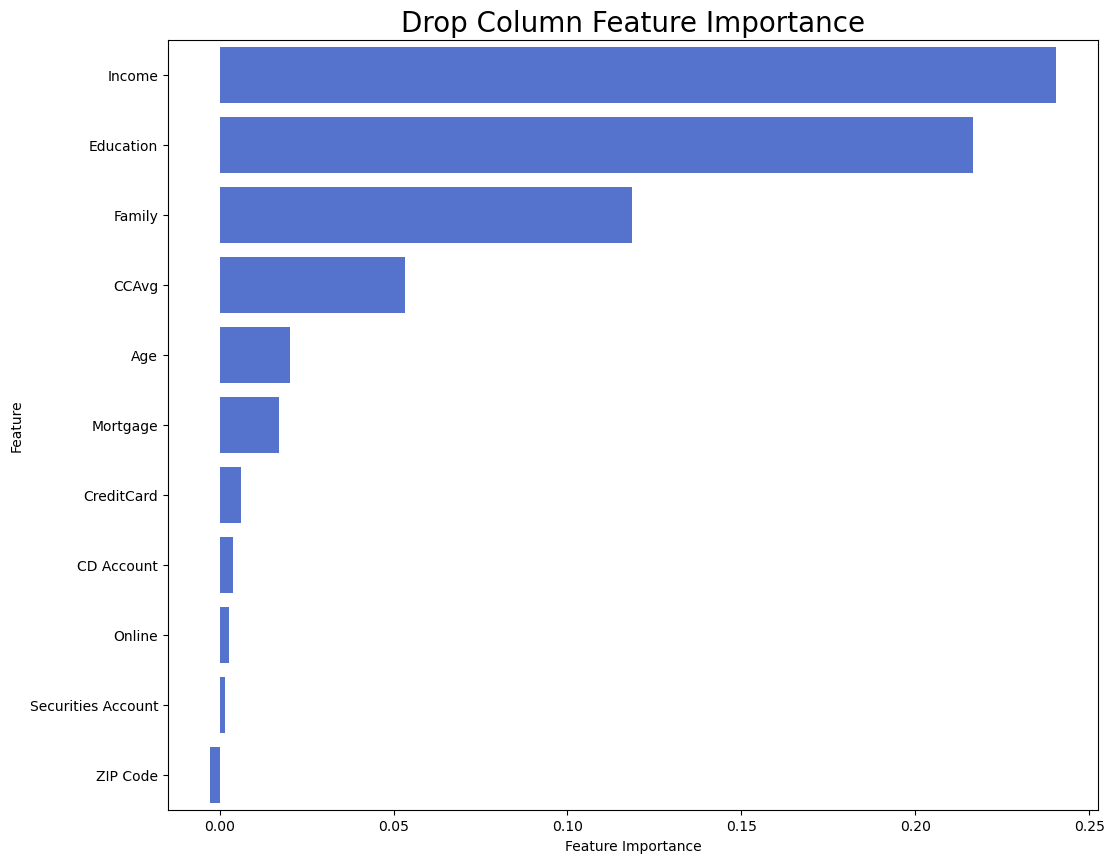

In [77]:
drop_column_importance_plot(ada_opt, x_train, y_train)

In [78]:
y_pred=ada_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.97      0.94      0.95        96

    accuracy                           0.99      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000



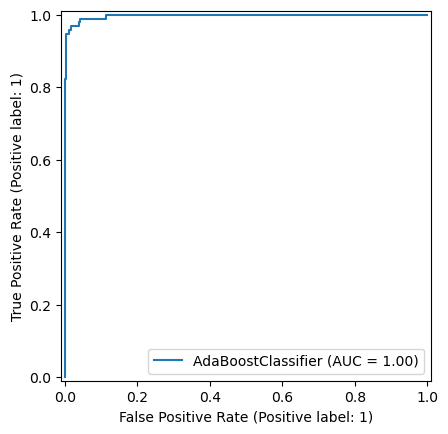

In [79]:
RocCurveDisplay.from_estimator(ada_opt, x_test, y_test)

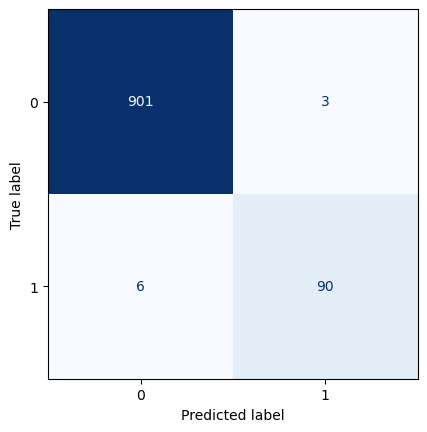

In [80]:
ConfusionMatrixDisplay.from_estimator(ada_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [81]:
accuracy_score(y_pred,y_test)

0.991

# Gradient Boost

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [83]:
# Define the hyperparameter grid for tuning
gbc_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'learning_rate': [0.3, 0.4, 0.5]
}

In [84]:
gbc = GradientBoostingClassifier(max_features=None, loss='log_loss', criterion='friedman_mse', random_state=0)

# Find the best hyperparameters from the tuning process
gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, x_train, y_train)

Best hyperparameters:
 {'learning_rate': 0.3, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}


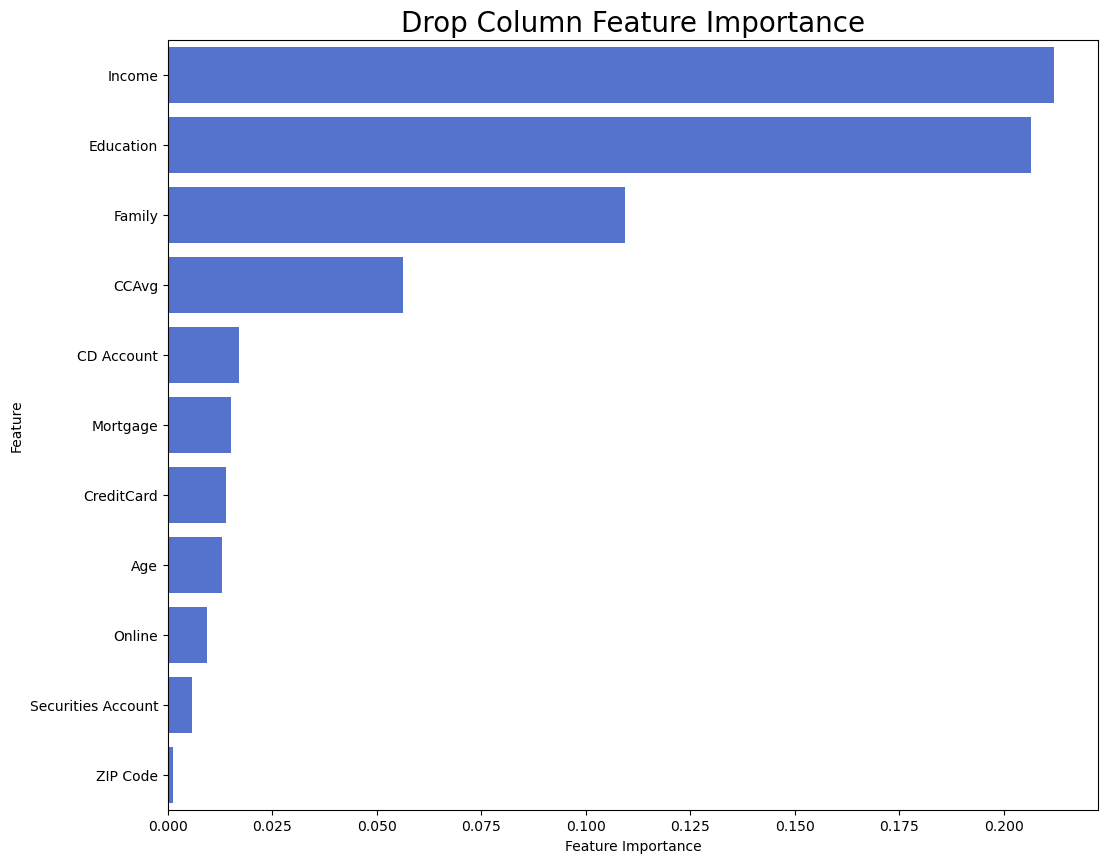

In [85]:
drop_column_importance_plot(gbc_opt, x_train, y_train)

In [86]:
y_pred=gbc_opt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.92      0.93        96

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



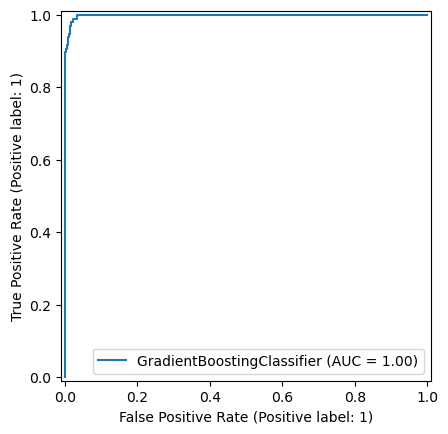

In [87]:
RocCurveDisplay.from_estimator(gbc_opt, x_test, y_test)

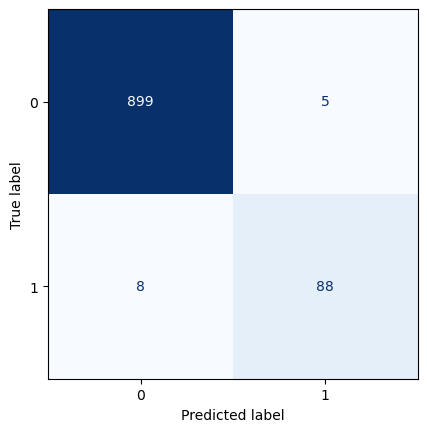

In [88]:
ConfusionMatrixDisplay.from_estimator(gbc_opt, x_test, y_test,colorbar=False, cmap='Blues')

In [89]:
accuracy_score(y_pred,y_test)

0.987

# XGBoost

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [91]:
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error', 
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

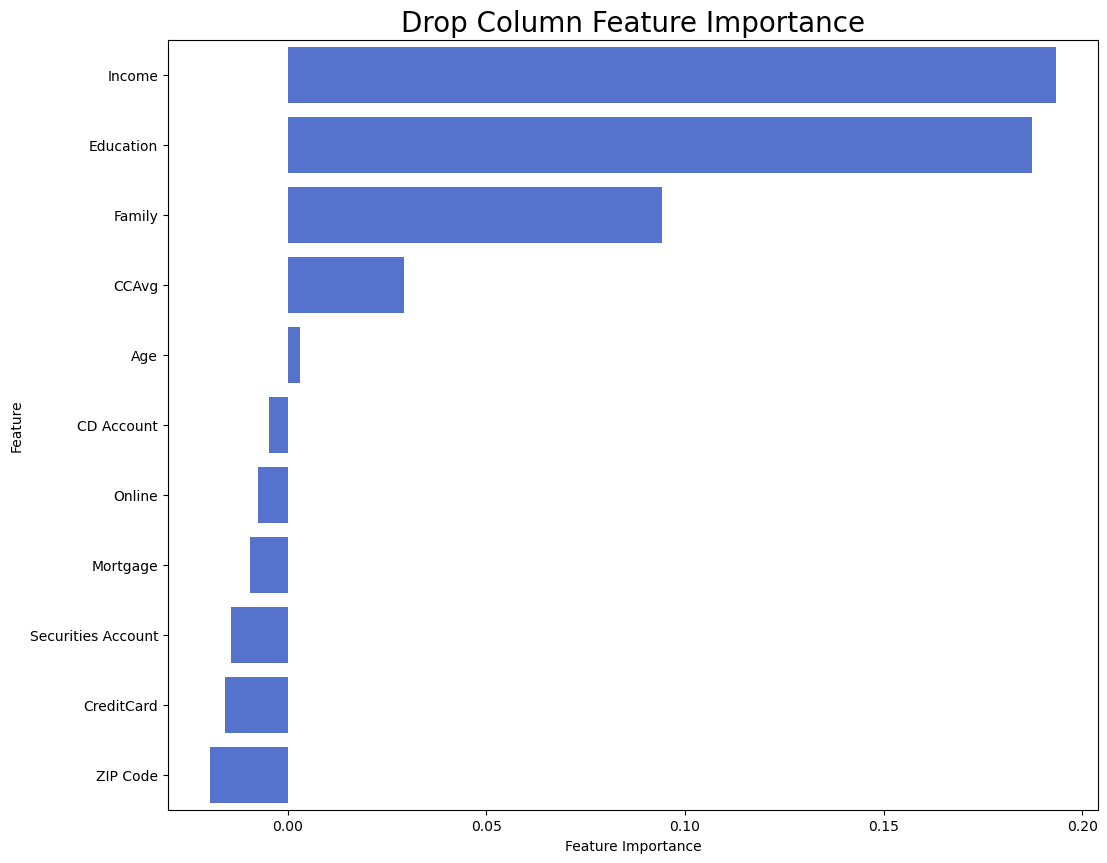

In [92]:
drop_column_importance_plot(xgb_opt, x_train, y_train)

In [93]:
feature_importances = drop_column_importance(xgb_opt, x_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.002]['feature'] # Threshold value of 0.002

# Filter dataset
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [94]:
xgb = XGBClassifier(max_depth=5,
                    learning_rate=0.3,
                    n_estimators=200,
                    min_child_weight=1,
                    scale_pos_weight=1.5,
                    colsample_bytree=0.8,
                    gamma=0.1,
                    booster='gbtree',
                    objective='binary:logistic',
                    eval_metric='error', 
                    random_state=0)

# Train the XGBoost Classifier
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [95]:
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.93      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



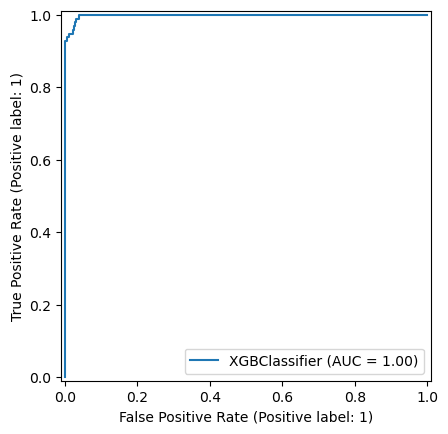

In [96]:
RocCurveDisplay.from_estimator(xgb, x_test, y_test)

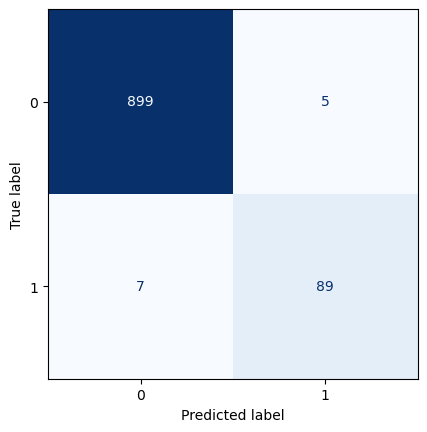

In [97]:
ConfusionMatrixDisplay.from_estimator(xgb, x_test, y_test,colorbar=False, cmap='Blues')

In [98]:
accuracy_score(y_pred,y_test)

0.988

In [99]:
import pickle

In [100]:
with open('model_new.pkl','wb') as file:
    pickle.dump(ada_opt,file)codeco

SyntaxError: invalid syntax (1128697374.py, line 2)